# import

In [8]:
import numpy as np
import pandas as pd
from scipy import stats #高度な科学技術計算を行うためのモジュール
from sklearn import cluster, preprocessing
import matplotlib.pyplot as plt 
from IPython.display import display, HTML # 画像表示などを行うためのモジュール
from mpl_toolkits.mplot3d import Axes3D
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
import matplotlib.colors as plc
%matplotlib inline

# シミュレーション

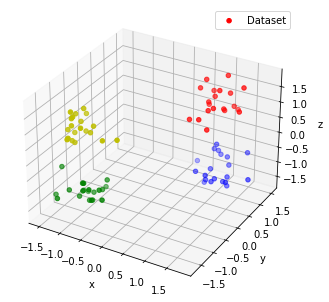

In [2]:
#シミュレーションデータ作成
x = np.array([np.random.normal(loc, 0.3, 20) for loc in [1, 1, -1, -1]]).flatten() #ランダムな80個の数を生成
y = np.array([np.random.normal(loc, 0.3, 20) for loc in [1, 1, -1, -1]]).flatten() #ランダムな80個の数を生成
z = np.array([np.random.normal(loc, 0.3, 20) for loc in [1, -1, 1, -1]]).flatten() #ランダムな80個の数を生成
data = np.c_[x, y, z]

fig = plt.figure()
ax1 = Axes3D(fig)
 
# ラベル設定
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
 
# 散布図作成
colorlist = ["r"]*20+["b"]*20+["y"]*20+["g"]*20
ax1.scatter3D(x, y, z, color = colorlist, label='Dataset')
plt.legend()
 
# 表示
plt.show()
plt.close()

In [6]:
#pyclusteringを用いたx-meansの実行
x_means_pyclustering = xmeans(
    data = data,
)
x_means_pyclustering.process()

No handles with labels found to put in legend.


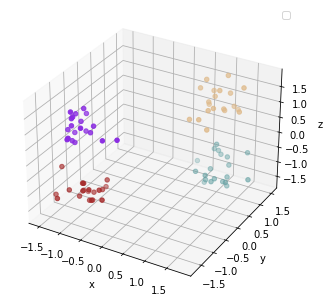

In [9]:
color_list = np.ones(len(data), dtype=object)
cluster_label = x_means_pyclustering.get_clusters()
for c in range(0, len(cluster_label), 1):
    color_list[cluster_label[c]] = list(plc.cnames)[c+10]  
    
    
fig = plt.figure()
ax1 = Axes3D(fig)
 
# ラベル設定
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
 
# 散布図作成
ax1.scatter3D(x, y, z, color = color_list)
plt.legend()
 
# 表示
plt.show()
plt.close()